In [1]:
#Conecting to Google Drive



!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse



# Generate auth tokens for Colab
from google.colab import auth
auth.authenticate_user()


# Generate creds for the Drive FUSE library.
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}


# Create a directory and mount Google Drive using that directory.
!mkdir -p drive
!google-drive-ocamlfuse drive

gpg: keybox '/tmp/tmpnq_i9klg/pubring.gpg' created
gpg: /tmp/tmpnq_i9klg/trustdb.gpg: trustdb created
gpg: key AD5F235DF639B041: public key "Launchpad PPA for Alessandro Strada" imported
gpg: Total number processed: 1
gpg:               imported: 1
··········
fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


In [0]:
!pip install -q keras

In [3]:
import numpy as np

from keras.preprocessing.text import Tokenizer


import random

from keras import preprocessing
from keras.preprocessing.sequence import pad_sequences


from keras.models import Sequential 
from keras.layers import Flatten, Dense
from keras.layers import Embedding
import os



Using TensorFlow backend.


In [4]:
#Get dataset

# !wget http://s3.amazonaws.com/text-datasets/aclImdb.zip
# !unzip -0 aclImdb.zip



--2018-05-13 06:34:21--  http://s3.amazonaws.com/text-datasets/aclImdb.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.165.45
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.165.45|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60711700 (58M) [application/zip]
Saving to: ‘aclImdb.zip.1’

aclImdb.zip.1       100%[===================>]  57.90M  61.7MB/s    in 0.9s    

2018-05-13 06:34:22 (61.7 MB/s) - ‘aclImdb.zip.1’ saved [60711700/60711700]

Archive:  aclImdb.zip
replace aclImdb/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [0]:

import os

imdb_dir = '/content/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')
labels = []
texts = []
for label_type in ['neg', 'pos']:
	dir_name = os.path.join(train_dir, label_type)
	for fname in os.listdir(dir_name):
		if fname[-4:] == '.txt':
			f = open(os.path.join(dir_name, fname))
			texts.append(f.read())
			f.close()
			if label_type == 'neg':
				labels.append(0)
			else:
				labels.append(1)

In [0]:
# Join the set of sexist and non sexist tweets in order to tokenize
all_tweets = texts

#Creating labels vector
labels = np.asarray(labels)
tweets_labels =  labels

In [12]:
# Tokenization of tweets

# tweets_tokens = []

maxlen = 200


max_words = 1000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(all_tweets)
sequences = tokenizer.texts_to_sequences(all_tweets)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

tweets_tokens = pad_sequences(sequences, maxlen=maxlen)





print('Shape of data tensor:', tweets_tokens.shape)
print('Shape of label tensor:', tweets_labels.shape)



Found 88582 unique tokens.
Shape of data tensor: (25000, 200)
Shape of label tensor: (25000,)


In [0]:
#Shuffle two list at once with same order


 
mixed = list(zip(tweets_tokens, tweets_labels))

random.shuffle(mixed)

tweets_tokens, tweets_labels = zip(*mixed)

In [15]:
# Looking if the shuffleing worked

print(tweets_labels[25:27])
print(tweets_tokens[25:27])

(0, 0)
(array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   1, 475, 174, 562,  11, 784,   4,   3,  31,  38,   8,
       189,  47,  23,  50,  71,   8,  11,  28, 784,   4, 880,   2, 585,
         2, 234,  72,  23,  61,  16,   1, 496, 597,   4, 131,  77,  27,
        11,   6,   1, 549,   4,  12,   5,   1,  26, 252, 129,   4, 932,
        14,   9,   6,   1, 784,   4,  32, 252,  34,  40, 568,   5,  27,
        53,   8,   3, 880,  16,   3, 309,   6,   9, 611,  12,  45,  56,
        66,  21,  74, 104,  38, 427, 461,   2, 257,  32,

In [16]:
# Data Splitting and Filling
# We split 80% of the data for the training set and 20% for the test set

index_eighty = round(0.8*len(tweets_tokens))

fifty_eighty = round(0.8*len(tweets_tokens))

current_index = index_eighty


x_train = np.array( tweets_tokens[:current_index] )
x_test =  np.array( tweets_tokens[current_index:] )

y_train = np.array( tweets_labels[:current_index] )
y_test =  np.array( tweets_labels[current_index:] )

print(x_train[-1] == x_test[0])

#max_words = index_eighty




[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [0]:


max_features = len(x_train)

# Filling with zeroes so dimentions fits
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [18]:
#Parsing GloVe Files

glove_dir = '/content/drive/Data Mining Project/Neural_Net/glove_files'
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [0]:
embedding_dim = 100


embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [20]:

model = Sequential()

model.add(Embedding( max_words, embedding_dim, input_length=maxlen))

model.add(Flatten())

# Adding a classifier layer
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()


#Addig GloVe Embeddings
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False


model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test) )
model.save_weights('pre_trained_glove_model.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 100)          100000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 20000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                640032    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 740,065
Trainable params: 740,065
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
18048/20000 [==========================>...] - ETA: 0s - loss: 0.6841 - acc: 0.6136

20000/20000 [==============================] - 7s 338us/step - loss: 0.6768 - acc: 0.6184 - val_loss: 0.5879 - val_acc: 0.6892
Epoch 2/10
20000/20000 [==============================] - 6s 306us/step - loss: 0.5367 - acc: 0.7347 - val_loss: 0.5609 - val_acc: 0.7144
Epoch 3/10
20000/20000 [==============================] - 6s 294us/step - loss: 0.4623 - acc: 0.7804 - val_loss: 0.5585 - val_acc: 0.7264
Epoch 4/10
15968/20000 [======================>.......] - ETA: 1s - loss: 0.4094 - acc: 0.8114

20000/20000 [==============================] - 6s 302us/step - loss: 0.4125 - acc: 0.8107 - val_loss: 0.6780 - val_acc: 0.6802
Epoch 5/10
20000/20000 [==============================] - 6s 300us/step - loss: 0.3583 - acc: 0.8407 - val_loss: 0.6440 - val_acc: 0.7070
Epoch 6/10
20000/20000 [==============================] - 6s 292us/step - loss: 0.3157 - acc: 0.8613 - val_loss: 0.6647 - val_acc: 0.7180
Epoch 7/10
17088/20000 [========================>.....] - ETA: 0s - loss: 0.2685 - acc: 0.8833

20000/20000 [==============================] - 6s 293us/step - loss: 0.2735 - acc: 0.8800 - val_loss: 1.3454 - val_acc: 0.6190
Epoch 8/10
20000/20000 [==============================] - 6s 295us/step - loss: 0.2324 - acc: 0.9025 - val_loss: 0.7854 - val_acc: 0.7084
Epoch 9/10
20000/20000 [==============================] - 6s 296us/step - loss: 0.1984 - acc: 0.9190 - val_loss: 0.8524 - val_acc: 0.7136
Epoch 10/10
16480/20000 [=======================>......] - ETA: 0s - loss: 0.1661 - acc: 0.9325

20000/20000 [==============================] - 6s 306us/step - loss: 0.1680 - acc: 0.9320 - val_loss: 0.9281 - val_acc: 0.7058


In [0]:
  new_instance = ["You're a fat bitch and nobody will like you. You shouldn't exist because you are a woman"]
  # create the tokenizer
  new_tok= Tokenizer()
  # fit the tokenizer on the documents
  new_tok.fit_on_texts(new_instance)
  
  temp = pad_sequences( new_tok.texts_to_sequences(new_instance) , maxlen=maxlen)


In [22]:

ynew = model.predict_classes(temp)
print(ynew)

[[0]]


In [23]:
new_instance = ["You're a very likeable, I hope we can be friends"]
# create the tokenizer
test_tok= Tokenizer()
# fit the tokenizer on the documents
test_tok.fit_on_texts(new_instance)
  

temp = pad_sequences( test_tok.texts_to_sequences(new_instance) , maxlen=maxlen)


ynew = model.predict_classes(temp)
print("Prediction")
print(ynew)

Prediction
[[0]]


In [32]:
new_instance = ["Shut up , make a sandwich while I keep playing since you're a  "] #
# create the tokenizer
new_tok= Tokenizer()
# fit the tokenizer on the documents
new_tok.fit_on_texts(new_instance)
  

temp = pad_sequences( new_tok.texts_to_sequences(new_instance) , maxlen=maxlen)


ynew = model.predict(temp)
print("Prediction")
print(ynew)

Prediction
[[0.9991936]]


In [25]:
!lscpu

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              2
On-line CPU(s) list: 0,1
Thread(s) per core:  2
Core(s) per socket:  1
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               63
Model name:          Intel(R) Xeon(R) CPU @ 2.30GHz
Stepping:            0
CPU MHz:             2300.000
BogoMIPS:            4600.00
Hypervisor vendor:   KVM
Virtualization type: full
L1d cache:           32K
L1i cache:           32K
L2 cache:            256K
L3 cache:            46080K
NUMA node0 CPU(s):   0,1
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc eagerfpu pni pclmulqdq ssse3 fma cx16 sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm kaiser fsgsbase tsc_adjust bmi1 avx2 smep 

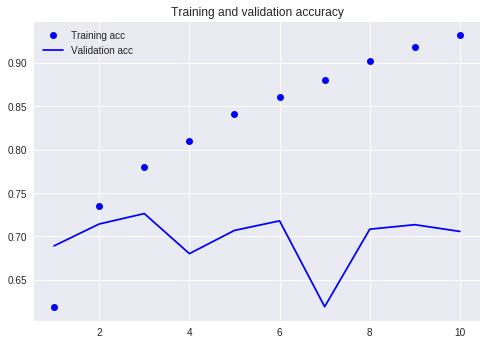

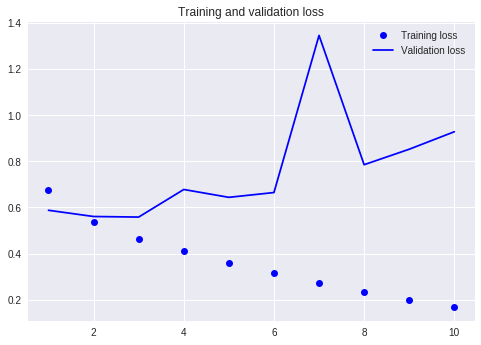

In [26]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [27]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

5000/5000 [==============================] - 1s 155us/step
Test loss: 0.9280731428146363
Test accuracy: 0.7058


In [0]:
model.save('sexist_classifier.h5')

In [47]:
new_instance = ["prepare  some food bitch"] #
# create the tokenizer
new_tok= Tokenizer()
# fit the tokenizer on the documents
new_tok.fit_on_texts(new_instance)
  

temp = pad_sequences( new_tok.texts_to_sequences(new_instance) , maxlen=maxlen)


ynew = model.predict(temp)
print("Prediction")
print(ynew)



Prediction
[[0.14956564]]


In [54]:
new_instance = ["this movie is so boring, the characters have no personality. Really, the plot is cheesy. The director lack creativity, he shouldn't be making such movies"] #
# create the tokenizer
new_tok= Tokenizer()
# fit the tokenizer on the documents
new_tok.fit_on_texts(new_instance)
  

temp = pad_sequences( new_tok.texts_to_sequences(new_instance) , maxlen=maxlen)


ynew = model.predict(temp)
print("Prediction")
print(ynew)



Prediction
[[0.00869026]]


In [57]:
new_instance = ["this movie is amazing. The characters are full of personality, the details are well thought"] #
# create the tokenizer
new_tok= Tokenizer()
# fit the tokenizer on the documents
new_tok.fit_on_texts(new_instance)
  

temp = pad_sequences( new_tok.texts_to_sequences(new_instance) , maxlen=maxlen)


ynew = model.predict(temp)
print("Prediction")
print(ynew)


Prediction
[[0.9755069]]


In [60]:
#new_instance = ["the plot is fluid, but at some point the story starts to feel boring and repetitive. However light and sound effects were superb, in general a decent title"] #

new_instance = ["since the beggining of the film you get absorbed deep into the plot, 10/10 would watch again, congrats"] #

# create the tokenizer
new_tok= Tokenizer()
# fit the tokenizer on the documents
new_tok.fit_on_texts(new_instance)
  

temp = pad_sequences( new_tok.texts_to_sequences(new_instance) , maxlen=maxlen)


ynew = model.predict(temp)
print("Prediction")
print(ynew)


Prediction
[[0.660336]]


In [0]:
test_dir = os.path.join(imdb_dir, 'test')
labels = []
texts = []
for label_type in ['neg', 'pos']:
	dir_name = os.path.join(test_dir, label_type)
	for fname in sorted(os.listdir(dir_name)):
		if fname[-4:] == '.txt':
			f = open(os.path.join(dir_name, fname))
			texts.append(f.read())
			f.close()
			if label_type == 'neg':
				labels.append(0)
			else:
				labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [37]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 4s 149us/step


[0.9254199801445008, 0.70476]

In [51]:
print(all_tweets[0])
print('\n')
print(all_tweets[1])

This is probably the best horror film made since Ed Wood died. <br /><br />I can't spoil the ending, because I have absolutely no idea what happened. I'll try my best, though. There are some kind of lesbian vampires, but they keep swapping bodies, so any character might or might not be the character you're supposed to think it is, or it might be a lesbian vampire. <br /><br />Sound confusing? It's not as confusing as you might think, since none of the characters make any sense to begin with. There's no plot, no character development, and random people show up, speak a few lines, and then disappear, never to be heard from again. There are also zombies, who are *possibly* the enemies of the vampires, but there's also a dream-within-a-dream kind of sequence in a mental hospital, so maybe none of this actually happened, and it's all the main character's hallucination. <br /><br />The upside? Both of the lead girls take their shirts off briefly. The special effects are simply mind-boggling 

In [0]:
t